# 딥러닝 (Week 11. RNN)

by Kyoungwon Seo (Dept. of Applied Artificial Intelligence, SeoulTech)
- e: kwseo@seoultech.ac.kr
- w: https://hai.seoultech.ac.kr

강의계획
1. Sequence Data와 RNN
2. RNN
3. 긴 시퀀스 다루기
4. Char-RNN을 사용해 셰익스피어 문체 생성하기
5. 감성분석
6. Transformer

# 0. 배경

## 1) 순차적 데이터 처리

- Image Caption $\rightarrow$ 입력된 image에 대해 자동으로 Caption을 생성할 수 있을까?
- 주식 가격 $\rightarrow$ 주식가격을 예측해 언제 사고팔지 알려줄 수 있을까?
- 언어의 자동번역 $\rightarrow$ 한국어로 작성된 문장을 영어로 번역할 수 있을까?<br>

  $\rightarrow$ 위 내용과 관련된 Data들은 모두 순차적 데이터(Sequential Data)라는 공통 특징이 있음

- Image Caption $\rightarrow$ 특정 단어들의 Sequence(ex. 고양이가 털실을 가지고 놀고 있습니다)
- 주식가격 $\rightarrow$ Time Sequence Data
- 언어의 자동번역 $\rightarrow$ 의미있게 나열된 단어의 Sequence

# 1. Sequence Data

## 1) 개념

- Sequence란 데이터를 순서대로 하나씩 나열하여 나타낸 데이터 구조

## 2) 예시

- Sequence Data의 예

종류 | 분석목적의 예
:---- | :----
Sound: 음성 |  음성인식, 기계번역
Sound: 음악 | 음악생성
Sound: 사고음 | 사고자동감지
문자열  |  번역기
DNA 염기서열  |  신약개발
비디오 인식  |  동영상분석/해석

## 3) 전통적 Sequence Data 처리

- 전통적인 Sequence Data 처리 방법들 ♣♣

처리 방법 명| 설명 및 예
:---- |:----
Time Domain Analysis | pixel 기반의 영상처리 방법
Frequence Domain Analysis | Fourier Analysis, 영상의 주파수공간 분석
Probabilistic Model | 통계적 Model방법들(가정들: 같은 시간구간의 data, Stationary)
Time Series Anaylsis | Autocorrelation 및 Moving Average를 이용한 방법
Decomposition | Time Series의 구성 요소를 분해하는 방법으로 Trend, Season, Circulation, Irregular로 구분

## 4) 특징

- Sequence Data는 Fully Connected Network 및 Convolutional Neural Network에서의 Input Data와 다른 특징을 가지고 있음 ♣

특징 | 설명
:---- |:----
Data간의 상관성이 매우 큼 | $\bullet$ (언어) 주어에 따라 동사의 형태가 결정됨 <br> $\bullet$ 음악의 경우 박자가 정해지면 마디안에 정해진 박자를 가지기 때문에 음의 길이가 서로 영향을 받음
순서의 의미가 큼 |  $\bullet$ Data의 input 순서가 바뀌면 의미가 달라지게 됨 <br> $\bullet$   "도"와 "시" 2개 data에 대해 "도시"와 "시도"는 완전히 다른 의미임
정보의 흐름을 가지고 있음 | $\bullet$ 뒤에 나오는 data가 앞의 data에 크게 의존하기도하지만, 경우에 따라서는 앞에 나오는 data가 가지는 의미를 알기 위해서는 뒤에 나타나는 data을 알아야함 <br> $\bullet$ (예) All is over between us. (말은 끝까지 들어봐야한다)
Dataset의 크기가 일정하지 않음 | $\bullet$ 문장이나 언어에 포함되는 단어의 수가 정해져 있지 않음 <br> $\bullet$ 자연에서 들리는 새의 소리의 길이가 일정하지 않음

## 5) FCN, CNN 특징

- 기존 모델의 한계점 --> RNN이 필요 ♣

Sequence Data의 특징 | Fully Connected Network(FCN)으로 처리 가능성 | Convolutional Neural Network(CNN)으로 처리 가능성
:---- |:---- |:----
Data간의 상관성이 매우 큼       | $\bullet$  input data의 dependency가 큰 경우 선형변환에 큰 악영향을 미침 | $\bullet$ CNN은 FCN에서 parameter를 sharing한 model로 filter를 parameter를 이용한 선형변환 과정이 존재함 <br>$\bullet$  FCN에서와 마찬가지로 선형변환에 큰 악역향을 미침
순서의 의미가 큼                | $\bullet$ FCN은 input data간의 위상관계를 고려하지 않음 <br> $\bullet$ FCN은 Sequence의 다른 position에서 학습한 feature를 학습하지 못함 | $\bullet$ CNN에서는 𝑖𝑚𝑎𝑔𝑒에 위치하는 관심 대상(object)이 여러 곳에 존재할 때, 위치에 상관없이 object 는 동일한 특징을 가진다는 가정인 stationarity를 가정하고 있음 따라서 순서의 의미를 다룰 수 있음
사용되는 parameter의 수 | $\bullet$  학습해야 할 Parameter의 크기가 너무 커짐  | $\bullet$ 학습해야 할 Parameter의 크기가 너무 커짐
Dataset의 크기가 일정하지 않음  | $\bullet$ 처리할 수 없음 |  $\bullet$  처리할 수 없음

## 6) 종류

시계열 시퀀스 데이터 생성 ♣
  - (1) 단변량 시계열 (univariate time series): 타입 스텝 마다 하나의 값을 가짐 (예: 웹사이트 시간당 접속 사용자의 수, 도시의 날짜별 온도)
  - (2) 다변량 시계열 (multivariate time series): 타입 스텝 마다 둘 이상의 값을 가짐 (예: 여러 지표를 사용한 기업의 분기 별 재정 안정성, 기말 텀프로젝트에서 다루는 eye tracking x, y, z 좌표 등)

# 2. RNN

## 1) Recurrent Neuron

### (1) 개념

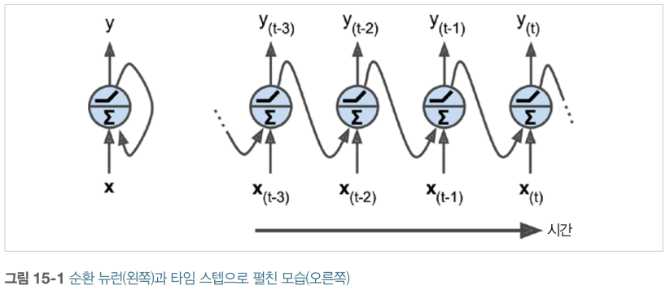

- 순환 뉴런: 입력을 받아 출력을 만든 후, 자신에게도 출력 결과를 전달

### (2) 구성 요소

#### 1] Input

- $x_{(t)}$와 $y_{(t-1)}$를 입력으로 받음 (첫 번째 time step에서는 이전 출력을 0으로 설정)
  - $t$: 타임 스텝(time step) or 프레임(frame) 
  - $x_{(t)}$:  입력 벡터 
  - $y_{(t-1)}$: 이전 time step의 출력 벡터

#### 2] Weight

- 각 순환 뉴런은 두 벌의 가중치 벡터를 가짐 ♣
  - 가중치 벡터: 입력 벡터 $x_{(t)}$를 위한 $w_{x}$와 이전 타임 스텝의 출력 $y_{(t-1)}$를 위한 $w_{y}$ 
  - 가중치 행렬: 가중치 벡터를 가중치 행렬 $W_{x}$와 $W_{y}$로 바꿀 수 있음

#### 3] Output ♣

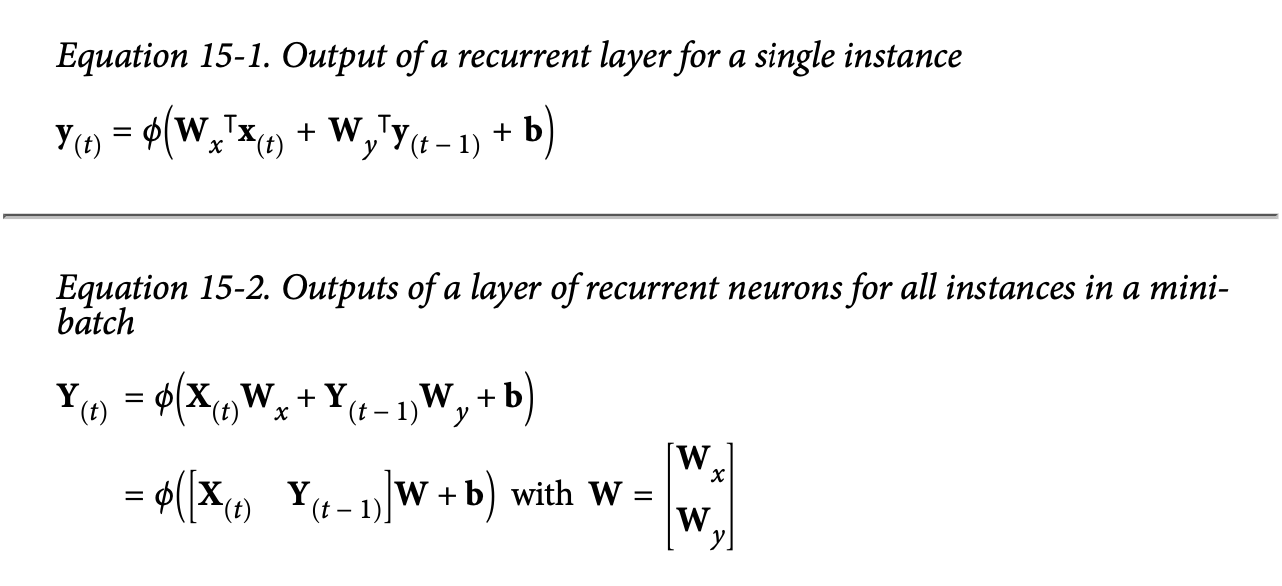

#### 4] Hidden State

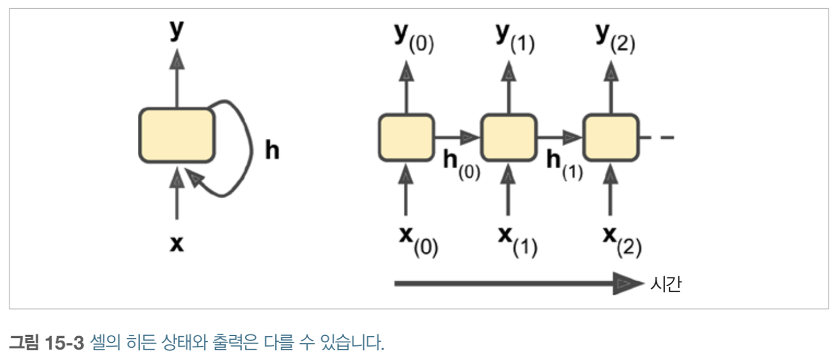

- 메모리 셀(memory cell): 타임 스텝에 걸쳐서 특정 상태를 보존하는 RNN의 구성 요소 ♣
- 순환 뉴런의 출력은 이전 타임 스텝의 모든 입력에 대한 함수로 메모리 형태임 ♣
  - $h_{(t)}$: 타임 스텝 t에서의 셀의 상태 
  - $h_{(t)}=f(h_{(t-1)}, x_{(t)})$ : 타임 스텝 t에서의 출력 $y_{(t)}$도 이전 상태와 현재 입력에 대한 함수

### (3) 네트워크

#### 1] 개념

- Sequence Model이란, 연속적인 입력(Sequential Input)으로부터 연속적인 출력(Sequential Output)을 생성하는 모델
- Sequence Model은 input과 출력의 형태에 따라 다양한 Model이 존재함

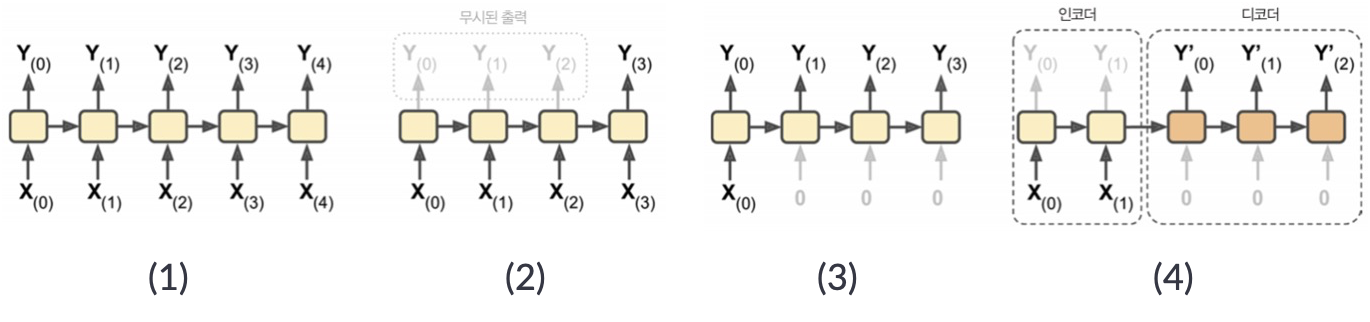

#### 2] 종류

  - [1] 시퀀스-투-시퀀스 네트워크(sequence-to-sequence network)
    - 1]] 입력: 시퀀스 데이터 / 출력: 시퀀스 데이터 
    - 2]] 구조 : RNN은 입력 시퀀스를 받아 출력 시퀀스를 만들 수 있음 
    - 3]] 활용 : 시계열 데이터를 예측하는데 유용 (e.g., 최근 N일치 주식가격을 주입하면, 네트워크가 각 입력값보다 하루 앞선 가격을 출력)
  - [2] 시퀀스-투-벡터 네트워크(sequence-to-vector network)
    - 1]] 입력: 시퀀스 데이터 / 출력: 벡터 
    - 2]] 구조 : 입력 시퀀스를 네트워크에 주입하고, 마지막을 제외한 모든 출력을 무시할 수 있음 (e.g., 영화 리뷰에 있는 연속된 단어를 주입하면, 네트워크는 감성 점수를 출력함)
  - [3] 벡터-투-시퀀스 네트워크(vector-to-sequence network)
    - 1]] 입력 : 벡터 / 출력: 시퀀스 데이터 
    - 2]] 구조 : 각 타임 스텝에서 하나의 입력 벡터를 반복해서 네트워크에 주입하고, 하나의 시퀀스를 출력할 수 있음 (e.g., 이미지를 입력하여 이미지에 대한 캡션을 출력할 수 있음)
  - [4] 인코더-디코더(encoder-decoder) ♣
    - 1]] 인코더: 시퀀스-투-벡터 / 디코더: 벡터-투-시퀀스 
    - 2]] 구조 : 인코더와 디코더의 조합을 사용하는 이중단계 모델 (e.g., 한 언어의 문장을 다른 언어로 번역하는 데 사용)
    - 3]] 특징 : 시퀀스-투-시퀀스 모델보다 성능이 좋음 / 입력과 출력의 개수가 같지 않아도 됨

#### 3] 네트워크 통과

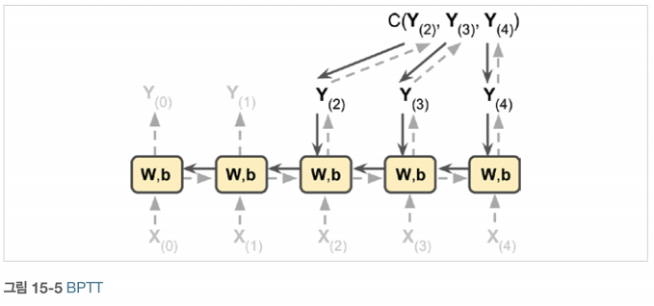

##### [1] BPTT 개념

- BPTT(backpropagation through time) ♣♣
  - 타임 스텝으로 네트워크를 펼치고 역전파 사용하는 방법 

##### [2] BPTT 구조

- 1]] 파선: 첫 번째 정방향 패스가 펼쳐진 네트워크를 통과함 
- 2]] 실선: 비용 함수의 그레이디언트는 펼쳐진 네트워크를 따라 역방향으로 전파 ♣
    - $Y_{(2)}$, $Y_{(3)}$, $Y_{(4)}$를 사용하여 비용함수가 계산, $Y_{(0)}$과 $Y_{(1)}$은 거치지 않음

## 2) 실습

- 3개의 단변량 시계열 데이터 (타임 스텝 50개, x로 표시된 값 예측하기) 생성
- 시계열 데이터 10,000개를 훈련 데이터로 생성하여 RNN 학습하기

In [ ]:
import numpy as np

def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   웨이브 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + 웨이브 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + 잡음
    return series[..., np.newaxis].astype(np.float32)

길이(n_steps)가 50인 1만 개의 시계열 데이터를 train : valid : test = 7 : 2 : 1 로 나눔

In [ ]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

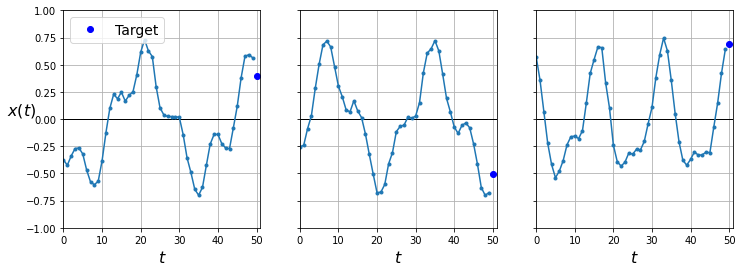

In [ ]:
import matplotlib.pyplot as plt

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()

### (4) 예측

#### 1] 순진한 예측

##### [1] 개념

RNN 성능 비교 (RNN의 성능을 타 방식과 비교하기 위해 기본적인 방식의 성능을 먼저 계산)
- 순진한 예측: 시계열의 마지막 값을 예측값으로 사용 (MSE=0.02) ♣

In [ ]:
from tensorflow import keras

y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

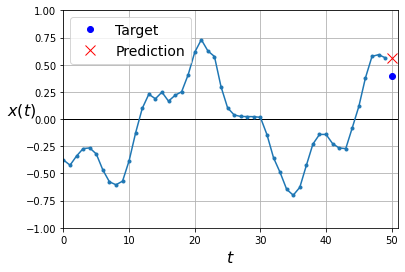

In [ ]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

### (5) RNN 종류

#### 1] 선형회귀 : 얘는 RNN 아님

- 선형회귀 예측: 완전 연결 네트워크를 사용하여 선형회귀 예측 실행(MSE=0.004) ♣

In [ ]:
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1001 - val_loss: 0.0545
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0379 - val_loss: 0.0266
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0202 - val_loss: 0.0157
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0131 - val_loss: 0.0116
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0103 - val_loss: 0.0098
Epoch 6/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 8/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 9/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 10/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0061 - val_loss: 0.006

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0042


0.004168087150901556

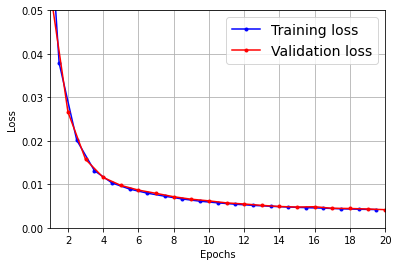

In [ ]:
import matplotlib as mpl

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 [==============================] - 0s 2ms/step


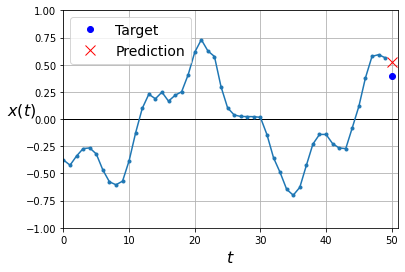

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

#### 2] SimpleRNN

##### [1] 특징

- SimpleRNN 층의 특징 ♣♣
  - 1]] 활성화 함수 : 하이퍼볼릭 탄젠트 ♣ 위에서는 relu를 썼었는데 SimpleRNN은 하이퍼볼릭 탄젠트
  - 2]] 반환값 : 최종 출력만 리턴하는 게 기본이고, 모든 타임 스텝에서 출력하려면 return_sequences=True로 설정 
  - 3]] 데이터 처리 : 모든 시계열 샘플에 데이터를 동시에 처리함

##### [2] 선형회귀 vs RNN ♣

- 선형회귀 모델은 51개의 파라미터(50개의 입력값에 대한 가중치 + 편향)을 사용
- RNN 모델은 3개의 파라미터(입력값 가중치 + 은닉 상태 차원 가중치=메모리셀 가중치 + 편향)만 사용

##### [3] 종류

1] SimpleRNN 1개

[1] 개념

- 가장 단순한 RNN 모델 예측 성능 (MSE=0.0109) 
  - 한 개의 순환뉴런을 갖는 SimpleRNN 순환층 한 개로 구성된 RNN 모델 
  - 타임 스텝 입력값의 크기는 임의로 설정해도 되기 때문에 None으로 지정 ♣

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 3s 10ms/step - loss: 0.0967 - val_loss: 0.0489
Epoch 2/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0369 - val_loss: 0.0296
Epoch 3/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0253 - val_loss: 0.0218
Epoch 4/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0198 - val_loss: 0.0177
Epoch 5/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0166 - val_loss: 0.0151
Epoch 6/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0146 - val_loss: 0.0134
Epoch 7/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0132 - val_loss: 0.0123
Epoch 8/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0124 - val_loss: 0.0116
Epoch 9/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 10/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0116 - val_loss: 

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 4ms/step - loss: 0.0109


0.010881561785936356

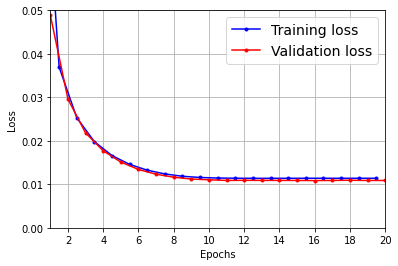

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 [==============================] - 0s 4ms/step


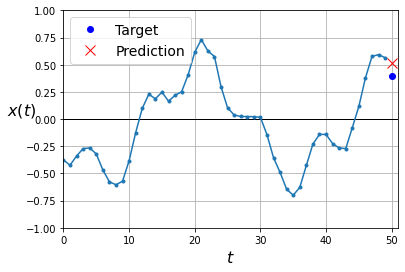

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

2] 심층 RNN

[1] 개념

- 심층 RNN(deep RNN): 셀을 여러 층으로 쌓은 RNN

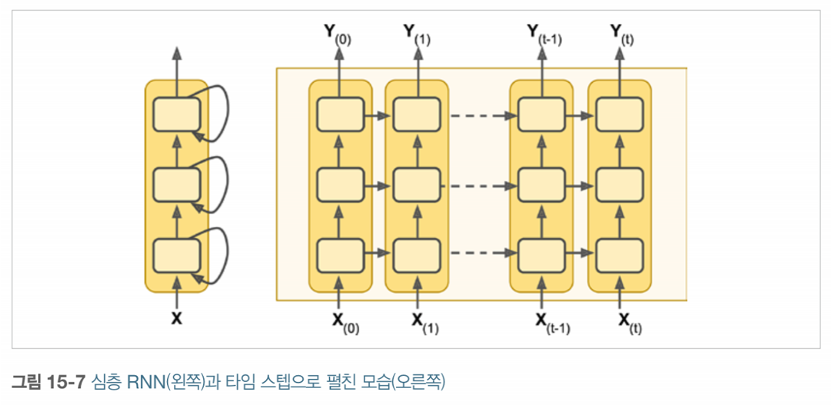

- 심층 RNN 모델 예측 성능 (MSE=0.003) 
  - 마지막 층을 제외한 순환층은 return_sequence=True를 사용해야함
  - 마지막 출력 층을 밀집층으로 바꾸고, 활성화 함수를 원하는 대로 설정 ♣♣

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 7s 23ms/step - loss: 0.0232 - val_loss: 0.0052
Epoch 2/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 3/20
219/219 [==============================] - 11s 52ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 4/20
219/219 [==============================] - 10s 44ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 5/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 6/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 7/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 8/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 9/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 10/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0030 - val_

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 7ms/step - loss: 0.0026


0.0026236248668283224

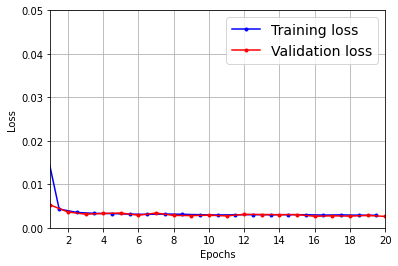

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 [==============================] - 1s 7ms/step


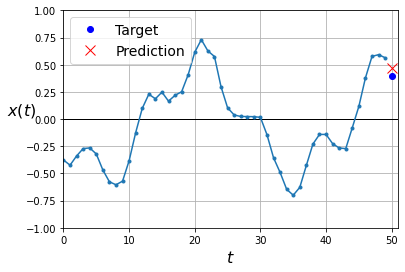

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

### (4) 예측 이어서

#### 2] 여러 타임 스텝 예측

##### [1] 개념

- 여러 타임 스텝 앞을 예측하기

##### [2] 종류 ♣

- 1]] 한 타임 스텝 예측을 원하는 만큼 반복하기
- 2]] 여러 타임 스텝의 값을 동시에 예측하기

- 1]] 한 타임 스텝 예측을 원하는 만큼 반복하기 
  - 타임 스텝을 예측하는 과정 반복으로 미래 예측의 정확도가 떨어질 수 있음 ♣ 각각의 스텝에서 나온 오차가 쌓인다

In [ ]:
np.random.seed(43) # 42는 훈련 세트에 있는 첫 번째 시리즈를 반환하기 때문에 다른 값으로 지정합니다

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

1/1 [==============================] - 0s 37ms/step


In [ ]:
Y_pred.shape

(1, 10, 1)

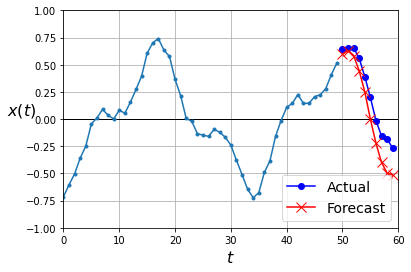

In [ ]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [ ]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [ ]:
X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:, 0]

63/63 [==============================] - 1s 11ms/step


In [ ]:
Y_pred.shape

(2000, 10)

In [ ]:
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_pred))

0.027510826

- 2]] 여러 타임 스텝 값 동시에 예측하기 ♣
  - 시퀀스-투-시퀀스 모델 사용
  - 전체 타임 스텝에서 미래 타입 스텝 10개의 값을 예측하도록 설정
  - 모든 순환층에서 return_sequence=True 로 설정 
  - 모든 타임 스텝에서의 출력값을 처리하기 위해 출력층에서 TimeDistributed클래스 활용 ♣♣

In [ ]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [ ]:
X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 11s 30ms/step - loss: 0.0508 - last_time_step_mse: 0.0400 - val_loss: 0.0429 - val_last_time_step_mse: 0.0324
Epoch 2/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0395 - last_time_step_mse: 0.0283 - val_loss: 0.0367 - val_last_time_step_mse: 0.0266
Epoch 3/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0326 - last_time_step_mse: 0.0215 - val_loss: 0.0373 - val_last_time_step_mse: 0.0286
Epoch 4/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0300 - last_time_step_mse: 0.0190 - val_loss: 0.0273 - val_last_time_step_mse: 0.0152
Epoch 5/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0276 - last_time_step_mse: 0.0158 - val_loss: 0.0259 - val_last_time_step_mse: 0.0135
Epoch 6/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0250 - last_time_step_mse: 0.0125 - val_loss: 0.0219 - val_last_time_step_mse: 0.0083
Epoch 7/20
219/219 [=

In [ ]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

1/1 [==============================] - 0s 478ms/step


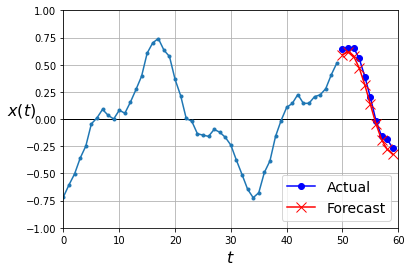

In [ ]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

### (5) RNN 종류

#### 2] 심층 RNN 이어서

##### [2] 문제점

1]] 긴 Sequence

- 심층 RNN을 훈련시킬 때 심층신경망 훈련 과정에서 발생하는 문제가 발생함

- [[1]] 문제 1: 불안정한 그레디언트 문제 ♣♣♣
    - 좋은 가중치 초기화, 빠른 옵티마이저, 드롭아웃, 그레디언트 클리핑 활용
    - 배치 정규화 또는 층 정규화 사용

배치 정규화를 사용한 심층 RNN

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.BatchNormalization(),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 13s 33ms/step - loss: 0.1929 - last_time_step_mse: 0.1902 - val_loss: 0.0877 - val_last_time_step_mse: 0.0832
Epoch 2/20
219/219 [==============================] - 7s 30ms/step - loss: 0.0537 - last_time_step_mse: 0.0449 - val_loss: 0.0549 - val_last_time_step_mse: 0.0462
Epoch 3/20
219/219 [==============================] - 8s 39ms/step - loss: 0.0471 - last_time_step_mse: 0.0375 - val_loss: 0.0451 - val_last_time_step_mse: 0.0358
Epoch 4/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0437 - last_time_step_mse: 0.0337 - val_loss: 0.0418 - val_last_time_step_mse: 0.0314
Epoch 5/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0409 - last_time_step_mse: 0.0306 - val_loss: 0.0391 - val_last_time_step_mse: 0.0287
Epoch 6/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0385 - last_time_step_mse: 0.0275 - val_loss: 0.0379 - val_last_time_step_mse: 0.0273
Epoch 7/20
219/219 [=

층 정규화를 사용한 심층 RNN

In [ ]:
from tensorflow.keras.layers import LayerNormalization

In [ ]:
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units,
                                                          activation=None)
        self.layer_norm = LayerNormalization()
        self.activation = keras.activations.get(activation)
    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        if inputs is not None:
            batch_size = tf.shape(inputs)[0]
            dtype = inputs.dtype
        return [tf.zeros([batch_size, self.state_size], dtype=dtype)]
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,
                     input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 13s 48ms/step - loss: 0.1613 - last_time_step_mse: 0.1574 - val_loss: 0.0755 - val_last_time_step_mse: 0.0692
Epoch 2/20
219/219 [==============================] - 10s 45ms/step - loss: 0.0665 - last_time_step_mse: 0.0575 - val_loss: 0.0597 - val_last_time_step_mse: 0.0484
Epoch 3/20
219/219 [==============================] - 11s 52ms/step - loss: 0.0562 - last_time_step_mse: 0.0454 - val_loss: 0.0521 - val_last_time_step_mse: 0.0399
Epoch 4/20
219/219 [==============================] - 10s 46ms/step - loss: 0.0498 - last_time_step_mse: 0.0378 - val_loss: 0.0466 - val_last_time_step_mse: 0.0337
Epoch 5/20
219/219 [==============================] - 10s 46ms/step - loss: 0.0452 - last_time_step_mse: 0.0330 - val_loss: 0.0434 - val_last_time_step_mse: 0.0318
Epoch 6/20
219/219 [==============================] - 10s 46ms/step - loss: 0.0404 - last_time_step_mse: 0.0272 - val_loss: 0.0376 - val_last_time_step_mse: 0.0234
Epoch 7/20
219/2

- [[2]] 문제 2: 긴 시퀀스를 처리할 때 입력의 앞 부분이 조금씩 잊혀짐 ♣
    - 장기 메모리를 가진 셀 활용 (LSTM 셀, GRU 셀)

#### 3] 긴 Sequence를 위한 RNN

##### [1] 종류

1]] LSTM 셀

[[1]] 개념

- LSTM 셀
  - 장단기 메모리(long short-term memory) 셀 (1997년 소개)

[[2]] 구성 요소

- 1. 상태 ♣
    - $h_{(t)}$ 단기 상태(short-term state)
    - $c_{(t)}$ 장기 상태(long-term state)
    - $g_{(t)}$ 출력하는 층
- 2. 제어기 : 세 개의 게이트 제어기 (gate controller)
    - 삭제 게이트 $f_{(t)}$ : 장기 상태의 어느 부분이 삭제되어야 하는지 제어
    - 입력 게이트 $i_{(t)}$ : $g_{(t)}$의 어느 부분이 장기 상태에 더해져야 하는지 제어
    - 출력 게이트 $o_{(t)}$ : 장기 상태의 어느 부분을 출력해야 하는지 제어

[[3]] 구조 ♣

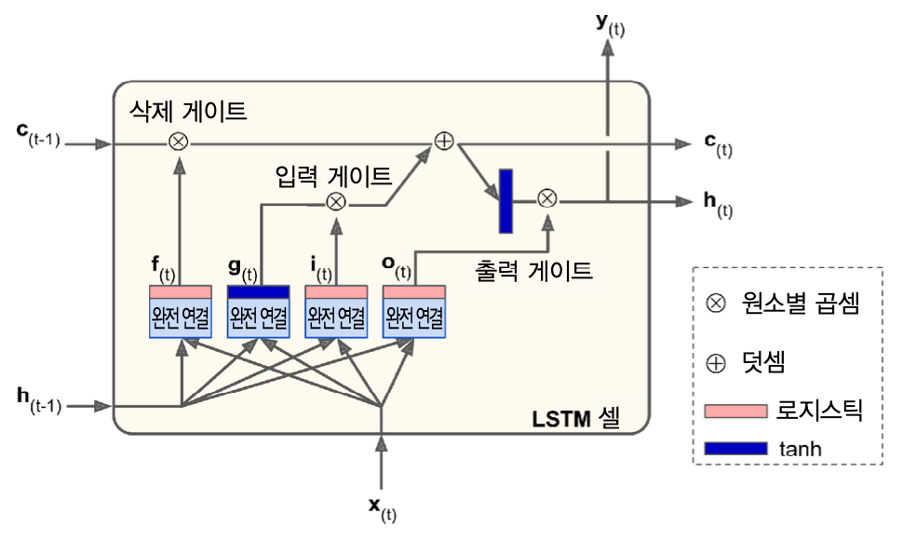

[[4]] 수식 ♣♣ 로지스틱 회귀, tanh 사용

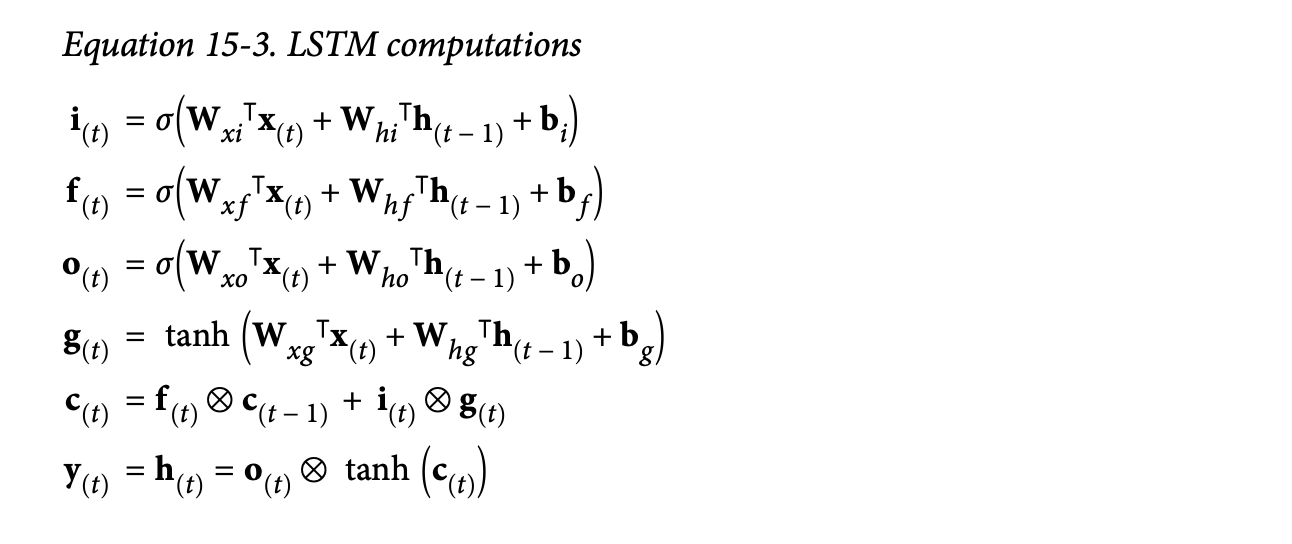

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 16s 51ms/step - loss: 0.0760 - last_time_step_mse: 0.0615 - val_loss: 0.0554 - val_last_time_step_mse: 0.0364
Epoch 2/20
219/219 [==============================] - 16s 72ms/step - loss: 0.0480 - last_time_step_mse: 0.0283 - val_loss: 0.0427 - val_last_time_step_mse: 0.0222
Epoch 3/20
219/219 [==============================] - 11s 52ms/step - loss: 0.0391 - last_time_step_mse: 0.0181 - val_loss: 0.0367 - val_last_time_step_mse: 0.0157
Epoch 4/20
219/219 [==============================] - 10s 46ms/step - loss: 0.0350 - last_time_step_mse: 0.0151 - val_loss: 0.0334 - val_last_time_step_mse: 0.0132
Epoch 5/20
219/219 [==============================] - 16s 71ms/step - loss: 0.0325 - last_time_step_mse: 0.0133 - val_loss: 0.0314 - val_last_time_step_mse: 0.0121
Epoch 6/20
219/219 [==============================] - 12s 55ms/step - loss: 0.0308 - last_time_step_mse: 0.0122 - val_loss: 0.0298 - val_last_time_step_mse: 0.0112
Epoch 7/20
219/2

In [ ]:
model.evaluate(X_valid, Y_valid)

63/63 [==============================] - 1s 12ms/step - loss: 0.0238 - last_time_step_mse: 0.0086


[0.023788681253790855, 0.008560795336961746]

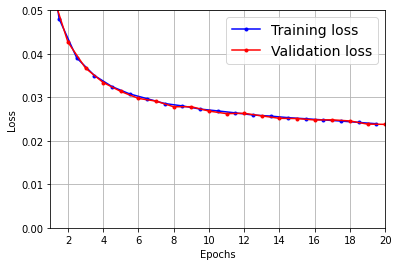

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

1/1 [==============================] - 1s 876ms/step


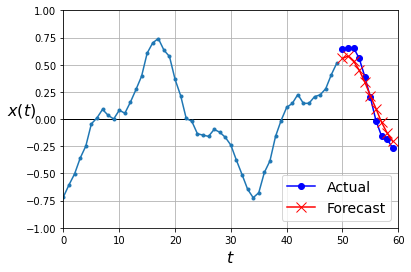

In [ ]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

4]] GRU 셀

[[1]] 개념

- GRU 셀
  - 게이트 순환 유닛(gated recurrent unit) 셀 (2014년)
  - LSTM의 간소화 버전으로 성능은 유사함

[[2]] 구성 요소

- 1. 상태 ♣♣
    - 두 상태 벡터가 하나의 벡터 $h_{(t)}$로 합쳐짐 ♣ Ct가 사라짐
- 2. 제어기 : 하나의 게이트 제어기 $z_{(t)}$가 삭제 게이트와 입력 게이트를 모두 제어 ♣♣
    - 게이트 제어기가 1 출력하면 삭제 게이트 열리고 입력 게이트가 닫힘
    - 게이트 제어기가 0 출력하면 삭제 게이트 닫히고 입력 게이트가 열림

[[3]] 구조 ♣♣

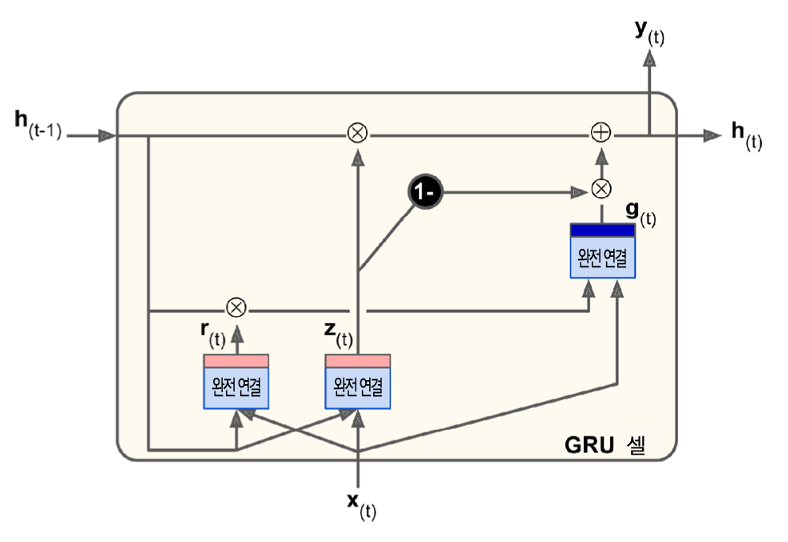

[[4]] 수식 ♣♣♣

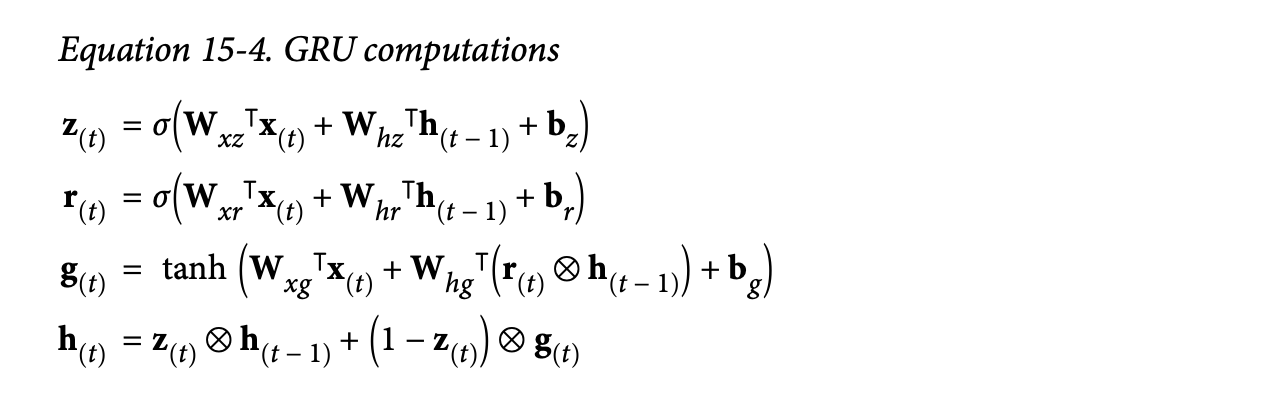

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 16s 54ms/step - loss: 0.0738 - last_time_step_mse: 0.0655 - val_loss: 0.0538 - val_last_time_step_mse: 0.0450
Epoch 2/20
219/219 [==============================] - 11s 49ms/step - loss: 0.0476 - last_time_step_mse: 0.0367 - val_loss: 0.0441 - val_last_time_step_mse: 0.0326
Epoch 3/20
219/219 [==============================] - 11s 50ms/step - loss: 0.0417 - last_time_step_mse: 0.0301 - val_loss: 0.0390 - val_last_time_step_mse: 0.0275
Epoch 4/20
219/219 [==============================] - 11s 50ms/step - loss: 0.0368 - last_time_step_mse: 0.0243 - val_loss: 0.0339 - val_last_time_step_mse: 0.0202
Epoch 5/20
219/219 [==============================] - 17s 76ms/step - loss: 0.0326 - last_time_step_mse: 0.0180 - val_loss: 0.0312 - val_last_time_step_mse: 0.0164
Epoch 6/20
219/219 [==============================] - 18s 84ms/step - loss: 0.0306 - last_time_step_mse: 0.0155 - val_loss: 0.0294 - val_last_time_step_mse: 0.0143
Epoch 7/20
219/2

In [ ]:
model.evaluate(X_valid, Y_valid)

63/63 [==============================] - 1s 11ms/step - loss: 0.0238 - last_time_step_mse: 0.0103


[0.023785505443811417, 0.010262810625135899]

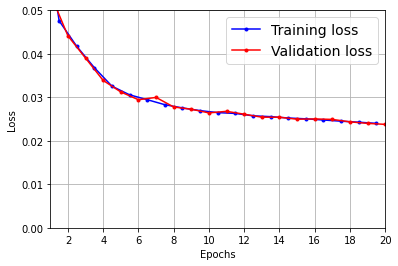

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

1/1 [==============================] - 1s 1s/step


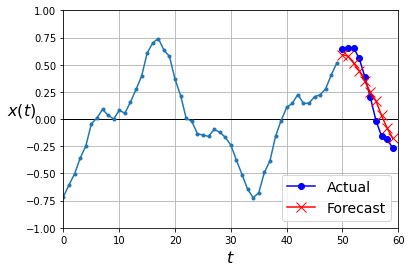

In [ ]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

[[5]] 단점 ♣♣

- LSTM, GRU 셀은 RNN 성공의 주역임. 그러나, 여전히 100 타임 스텝 이상의 시퀀스에서 장기 패턴을 학습하기 어려움

[[6]] 해결책 ♣♣

- 1D 합성곱 층을 사용해 시퀀스 처리하기
  - 1D 합성곱 층이 몇 개의 커널을 시퀀스 위를 슬라이딩하여 커널마다 1D 특성 맵을 출력
  - 합성곱 층으로 시퀀스 길이를 줄이면 GRU 층이 더 긴 패턴을 감지하는데 도움이 됨

```
1D conv layer with kernel size 4, stride 2, VALID padding:

              |-----2-----|     |-----5---...------|     |-----23----|
        |-----1-----|     |-----4-----|   ...      |-----22----|
  |-----0----|      |-----3-----|     |---...|-----21----|
X: 0  1  2  3  4  5  6  7  8  9  10 11 12 ... 42 43 44 45 46 47 48 49
Y: 1  2  3  4  5  6  7  8  9  10 11 12 13 ... 43 44 45 46 47 48 49 50
  /10 11 12 13 14 15 16 17 18 19 20 21 22 ... 52 53 54 55 56 57 58 59

Output:

X:     0/3   2/5   4/7   6/9   8/11 10/13 .../43 42/45 44/47 46/49
Y:     4/13  6/15  8/17 10/19 12/21 14/23 .../53 46/55 48/57 50/59
```

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",
                        input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train[:, 3::2], epochs=20,
                    validation_data=(X_valid, Y_valid[:, 3::2]))

Epoch 1/20
219/219 [==============================] - 12s 33ms/step - loss: 0.0681 - last_time_step_mse: 0.0601 - val_loss: 0.0477 - val_last_time_step_mse: 0.0396
Epoch 2/20
219/219 [==============================] - 7s 30ms/step - loss: 0.0414 - last_time_step_mse: 0.0340 - val_loss: 0.0367 - val_last_time_step_mse: 0.0285
Epoch 3/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0338 - last_time_step_mse: 0.0257 - val_loss: 0.0307 - val_last_time_step_mse: 0.0218
Epoch 4/20
219/219 [==============================] - 7s 32ms/step - loss: 0.0282 - last_time_step_mse: 0.0184 - val_loss: 0.0259 - val_last_time_step_mse: 0.0152
Epoch 5/20
219/219 [==============================] - 7s 32ms/step - loss: 0.0249 - last_time_step_mse: 0.0143 - val_loss: 0.0246 - val_last_time_step_mse: 0.0141
Epoch 6/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0234 - last_time_step_mse: 0.0125 - val_loss: 0.0227 - val_last_time_step_mse: 0.0115
Epoch 7/20
219/219 [=

5]] WAVENET

[[1]] 개념

- WAVENET
  - 딥마인드 연구팀의 2016년 논문: https://arxiv.org/abs/1609.03499
  - 하위 층은 단기 패턴, 상위 층은 장기 패턴을 학습 ♣♣
  - 팽창 비율(dilation rate)을 두 배로 늘리는 1D 합성곱 층을 쌓음 ♣♣
  - 덕분에 네트워크가 아주 긴 시퀀스를 효율적으로 처리할 수 있음

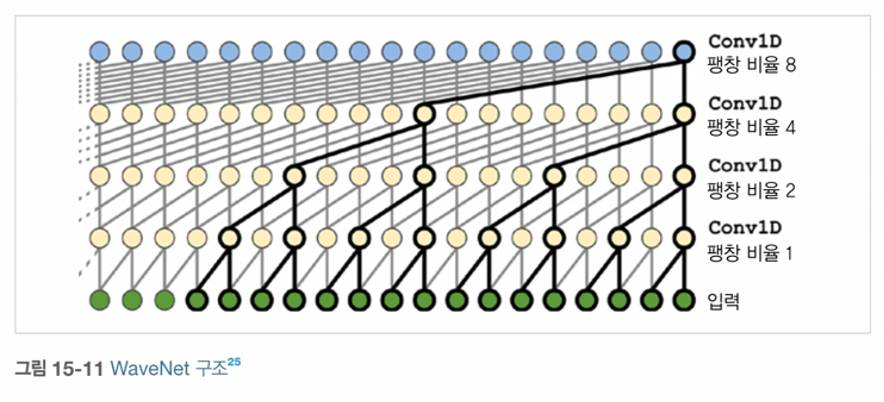

```
C2  /\ /\ /\ /\ /\ /\ /\ /\ /\ /\ /\ /\ /\.../\ /\ /\ /\ /\ /\
   \  /  \  /  \  /  \  /  \  /  \  /  \       /  \  /  \  /  \
     /    \      /    \      /    \                 /    \
C1  /\ /\ /\ /\ /\ /\ /\ /\ /\ /\ /\  /\ /.../\ /\ /\ /\ /\ /\ /\
X: 0  1  2  3  4  5  6  7  8  9  10 11 12 ... 43 44 45 46 47 48 49
Y: 1  2  3  4  5  6  7  8  9  10 11 12 13 ... 44 45 46 47 48 49 50
  /10 11 12 13 14 15 16 17 18 19 20 21 22 ... 53 54 55 56 57 58 59
```

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
    model.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding="causal",
                                  activation="relu", dilation_rate=rate))
model.add(keras.layers.Conv1D(filters=10, kernel_size=1))
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 6s 20ms/step - loss: 0.0669 - last_time_step_mse: 0.0543 - val_loss: 0.0365 - val_last_time_step_mse: 0.0231
Epoch 2/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0324 - last_time_step_mse: 0.0193 - val_loss: 0.0294 - val_last_time_step_mse: 0.0167
Epoch 3/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0283 - last_time_step_mse: 0.0156 - val_loss: 0.0269 - val_last_time_step_mse: 0.0145
Epoch 4/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0261 - last_time_step_mse: 0.0136 - val_loss: 0.0255 - val_last_time_step_mse: 0.0131
Epoch 5/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0248 - last_time_step_mse: 0.0125 - val_loss: 0.0245 - val_last_time_step_mse: 0.0122
Epoch 6/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0240 - last_time_step_mse: 0.0118 - val_loss: 0.0233 - val_last_time_step_mse: 0.0108
Epoch 7/20
219/219 [==

#### 4] 기타 RNN

##### [1] 종류

1]] Char RNN

[[1]] 셰익스피어 예제

- 시퀀스를 셔플 윈도우 배치로 나누기 ♣♣
  - 0~14까지 시퀀스를 2개씩 이동하면서 길이가 5인 윈도우로 나누기(가령,[0, 1, 2, 3, 4], [2, 3, 4, 5, 6], 등)
  - 그다음 이를 섞고 입력(처음 네 개의 타입스텝)과 타깃(마지막 네 개의 타임스텝)으로 나누기(즉, [2, 3, 4, 5, 6]를 [[2, 3, 4, 5], [3, 4, 5, 6]]로 나누기)
  - 그다음 입력/타깃 쌍 세 개로 구성된 배치를 만듦

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

n_steps = 5
dataset = tf.data.Dataset.from_tensor_slices(tf.range(15))
dataset = dataset.window(n_steps, shift=2, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(n_steps))
dataset = dataset.shuffle(10).map(lambda window: (window[:-1], window[1:]))
dataset = dataset.batch(3).prefetch(1)
for index, (X_batch, Y_batch) in enumerate(dataset):
    print("_" * 20, "Batch", index, "\nX_batch")
    print(X_batch.numpy())
    print("=" * 5, "\nY_batch")
    print(Y_batch.numpy())

____________________ Batch 0 
X_batch
[[6 7 8 9]
 [2 3 4 5]
 [4 5 6 7]]
===== 
Y_batch
[[ 7  8  9 10]
 [ 3  4  5  6]
 [ 5  6  7  8]]
____________________ Batch 1 
X_batch
[[ 0  1  2  3]
 [ 8  9 10 11]
 [10 11 12 13]]
===== 
Y_batch
[[ 1  2  3  4]
 [ 9 10 11 12]
 [11 12 13 14]]


- 데이터 로드하고 데이터셋 준비하기

In [ ]:
shakespeare_url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
filepath = keras.utils.get_file("shakespeare.txt", shakespeare_url)
with open(filepath) as f:
    shakespeare_text = f.read()

1115394/1115394 [==============================] - 0s 0us/step


In [ ]:
print(shakespeare_text[:148])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?



In [ ]:
"".join(sorted(set(shakespeare_text.lower())))

"\n !$&',-.3:;?abcdefghijklmnopqrstuvwxyz"

- 케라스 Tokenizer 클래스를 사용해 모든 글자를 정수로 인코딩

In [ ]:
tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(shakespeare_text)

In [ ]:
tokenizer.texts_to_sequences(["First"])

[[20, 6, 9, 8, 3]]

In [ ]:
tokenizer.sequences_to_texts([[20, 6, 9, 8, 3]])

['f i r s t']

- 순차 데이터셋을 나누기 ♣♣
  - 시계열을 다룰때는 보통 시간에 따라 나눔
  - 시간에 따라 검증세트에 대한 모델의 오차를 그려보는것이 좋음
  - 모델이 안정적이지 않을때는 더 짧은 시간 간격으로 모델을 훈련해야 좋음 ♣♣

In [ ]:
max_id = len(tokenizer.word_index) # 고유한 문자 개수
dataset_size = tokenizer.document_count # 전체 문자 개수

In [ ]:
[encoded] = np.array(tokenizer.texts_to_sequences([shakespeare_text])) - 1
train_size = dataset_size * 90 // 100
dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])

- 순차 데이터를 윈도 여러 개로 자르기 ♣♣
  - 데이터셋의 window() 메서드를 사용해 작은 텍스트 윈도로 변환
  - flat_map은 dataset에 함수를 apply해주고, 결과를 flatten하게 펼쳐줌
  - 반드시 학습전에 shuffle을 통해 적절하게 Dataset을 섞어주어야 함

In [ ]:
n_steps = 100
window_length = n_steps + 1 # 타깃 = 한 글자 앞선 입력
dataset = dataset.window(window_length, shift=1, drop_remainder=True)

In [ ]:
dataset = dataset.flat_map(lambda window: window.batch(window_length))

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
batch_size = 32
dataset = dataset.shuffle(10000).batch(batch_size)
dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))

In [ ]:
dataset = dataset.map(
    lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))

In [ ]:
dataset = dataset.prefetch(1)

In [ ]:
for X_batch, Y_batch in dataset.take(1):
    print(X_batch.shape, Y_batch.shape)

(32, 100, 39) (32, 100)


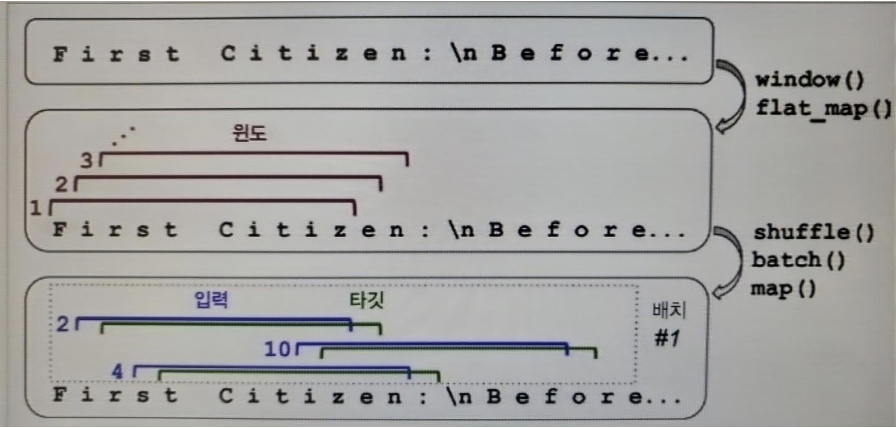

- Char-RNN 모델 만들고 훈련하기

**경고**: 다음 코드는 하드웨어에 따라 실행하는데 24시간이 걸릴 수 있음

In [1]:
model = keras.models.Sequential([
    keras.layers.GRU(128, return_sequences=True, input_shape=[None, max_id],
                     #dropout=0.2, recurrent_dropout=0.2),
                     dropout=0.2),
    keras.layers.GRU(128, return_sequences=True,
                     #dropout=0.2, recurrent_dropout=0.2),
                     dropout=0.2),
    keras.layers.TimeDistributed(keras.layers.Dense(max_id,
                                                    activation="softmax")) # 전체 문자열 중에서 가장 가능성 높은 결과 추출
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
history = model.fit(dataset, epochs=10)

NameError: name 'keras' is not defined

- 모델로 텍스트 생성하기

In [ ]:
def preprocess(texts):
    X = np.array(tokenizer.texts_to_sequences(texts)) - 1
    return tf.one_hot(X, max_id)

In [ ]:
X_new = preprocess(["How are yo"])
#Y_pred = model.predict_classes(X_new)
Y_pred = np.argmax(model(X_new), axis=-1)
tokenizer.sequences_to_texts(Y_pred + 1)[0][-1] # 1st sentence, last char

'u'

- Char-RNN 모델을 사용해 새로운 텍스트를 생성하려면 먼저 초기텍스트를 주입하고 모델이 가장 가능성 있는 다음 글자를 예측함 
- 하지만 실제로는 같은 단어가 반복될 가능성이 있음 ♣♣
- tf.random,categorical() 함수를 사용해 모델이 추정한 확률을 기반으로 다음글자를 무작위로 선택할 수 있음 ♣♣

In [ ]:
tf.random.set_seed(42)

tf.random.categorical([[np.log(0.5), np.log(0.4), np.log(0.1)]], num_samples=40).numpy()

array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0]])

- 다양성을 제어하는 하이퍼 파라미터, 온도 (temparature) ♣♣
  - 0에 가까울수록 높은 확률을 가진 글자를 선택함

In [ ]:
def next_char(text, temperature=1):
    X_new = preprocess([text])
    y_proba = model(X_new)[0, -1:, :]
    rescaled_logits = tf.math.log(y_proba) / temperature
    char_id = tf.random.categorical(rescaled_logits, num_samples=1) + 1
    return tokenizer.sequences_to_texts(char_id.numpy())[0]

In [ ]:
tf.random.set_seed(42)

next_char("How are yo", temperature=1)

'u'

In [ ]:
def complete_text(text, n_chars=50, temperature=1):
    for _ in range(n_chars):
        text += next_char(text, temperature)
    return text

In [ ]:
tf.random.set_seed(42)

print(complete_text("t", temperature=0.2))

the maid in padua for my father is a stood
and so m


In [ ]:
print(complete_text("t", temperature=1))

toke on advised in sobel countryman,
and signior gr


In [ ]:
print(complete_text("t", temperature=2))

tpeniomently!
well maze: yet 'pale deficuruli-faeem


- 위 셰익스피어 모델은 1에 가까운 온도에서 가장 잘 작동함 ♣

- 지금까지 위에서 사용한 것은 상태가 없는 RNN (stateless RNN) ♣♣♣
  - 훈련 반복마다 모델의 은닉 상태를 0으로 초기화

- 상태가 있는 RNN (statefull RNN) ♣♣
  - 한 훈련 배치를 처리한 후에 마지막 상태를 다음 훈련 배치의 초기 상태로 사용
  - 이를 통해 역전파는 짧은 시퀀스에서 일어나지만 모델이 장기간 패턴을 학습할 수 있음

- 상태가 있는 RNN을 만들기 위해서는? ♣♣
  - 순차적이고 겹치지 않는 입력 시퀀스 만들기
    - 배치에 있는 각 입력 시퀀스가 이전 배치의 시퀀스가 끝난 지점에서 시작해야 함
    - window() 메서드에서 shift=1 대신 shift=n_steps 사용 ♣♣

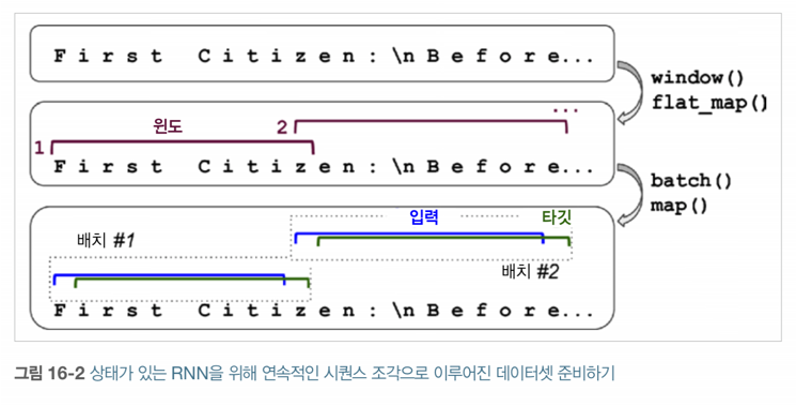

In [ ]:
tf.random.set_seed(42)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])
dataset = dataset.window(window_length, shift=n_steps, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(window_length))
dataset = dataset.batch(1)
dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))
dataset = dataset.map(
    lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))
dataset = dataset.prefetch(1)

In [ ]:
batch_size = 32
encoded_parts = np.array_split(encoded[:train_size], batch_size)
datasets = []
for encoded_part in encoded_parts:
    dataset = tf.data.Dataset.from_tensor_slices(encoded_part)
    dataset = dataset.window(window_length, shift=n_steps, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_length))
    datasets.append(dataset)
dataset = tf.data.Dataset.zip(tuple(datasets)).map(lambda *windows: tf.stack(windows))
dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))
dataset = dataset.map(
    lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))
dataset = dataset.prefetch(1)

**노트**: 여기에서도 GPU 가속을 위해 (책과 달리) `recurrent_dropout=0.2`을 주석 처리합니다. ♣♣

In [ ]:
model = keras.models.Sequential([
    keras.layers.GRU(128, return_sequences=True, stateful=True,
                     #dropout=0.2, recurrent_dropout=0.2,
                     dropout=0.2,
                     batch_input_shape=[batch_size, None, max_id]),
    keras.layers.GRU(128, return_sequences=True, stateful=True,
                     #dropout=0.2, recurrent_dropout=0.2),
                     dropout=0.2),
    keras.layers.TimeDistributed(keras.layers.Dense(max_id,
                                                    activation="softmax"))
])

In [ ]:
class ResetStatesCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        self.model.reset_states()

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
history = model.fit(dataset, epochs=50,
                    callbacks=[ResetStatesCallback()])

Epoch 1/50
313/313 [==============================] - 6s 12ms/step - loss: 2.6200
Epoch 2/50
313/313 [==============================] - 4s 12ms/step - loss: 2.2410
Epoch 3/50
313/313 [==============================] - 4s 12ms/step - loss: 2.1105
Epoch 4/50
313/313 [==============================] - 4s 12ms/step - loss: 2.0368
Epoch 5/50
313/313 [==============================] - 4s 12ms/step - loss: 1.9860
Epoch 6/50
313/313 [==============================] - 4s 12ms/step - loss: 1.9488
Epoch 7/50
313/313 [==============================] - 4s 12ms/step - loss: 1.9205
Epoch 8/50
313/313 [==============================] - 4s 12ms/step - loss: 1.8985
Epoch 9/50
313/313 [==============================] - 4s 12ms/step - loss: 1.8797
Epoch 10/50
313/313 [==============================] - 4s 12ms/step - loss: 1.8655
Epoch 11/50
313/313 [==============================] - 4s 12ms/step - loss: 1.8533
Epoch 12/50
313/313 [==============================] - 4s 12ms/step - loss: 1.8412
Epoch 13/50
3

- 상태가 있는 RNN에 다른 크기의 배치를 사용하려면 동일한 구조의 상태가 없는 RNN을 만들고 가중치를 복사해야 함 ♣♣

In [ ]:
stateless_model = keras.models.Sequential([
    keras.layers.GRU(128, return_sequences=True, input_shape=[None, max_id]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(max_id,
                                                    activation="softmax"))
])

- 가중치 복사 과정:

In [ ]:
stateless_model.build(tf.TensorShape([None, None, max_id]))

In [ ]:
stateless_model.set_weights(model.get_weights())
model = stateless_model

In [ ]:
tf.random.set_seed(42)

print(complete_text("t"))

thing idsumper your shint.
why, he has go too stone


[[2]] 감성분석 예제

- IMDb(Internet Movie Database)에서 추출한 리뷰 데이터 5만개 (훈련,테스트 반반) + 리뷰가 부정적인지(0) 긍정적인지(1)를 나타내는 이진 타깃 포함
- 글자 수준이 아닌 단어 수준의 모델에서 자주 쓰이는 자연어 처리 작업

In [ ]:
tf.random.set_seed(42)

- IMDB 데이터셋 로드

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
X_train[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [ ]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3: word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
    id_to_word[id_] = token
" ".join([id_to_word[id_] for id_ in X_train[0][:10]])

1641221/1641221 [==============================] - 0s 0us/step


'<sos> this film was just brilliant casting location scenery story'

In [ ]:
import tensorflow_datasets as tfds

datasets, info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteFD9OWY/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteFD9OWY/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteFD9OWY/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
datasets.keys()

dict_keys([Split('train'), Split('test'), Split('unsupervised')])

In [ ]:
train_size = info.splits["train"].num_examples
test_size = info.splits["test"].num_examples

In [ ]:
train_size, test_size

(25000, 25000)

In [ ]:
for X_batch, y_batch in datasets["train"].batch(2).take(1):
    for review, label in zip(X_batch.numpy(), y_batch.numpy()):
        print("Review:", review.decode("utf-8")[:200], "...")
        print("Label:", label, "= Positive" if label else "= Negative")
        print()

Review: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting  ...
Label: 0 = Negative

Review: I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However  ...
Label: 0 = Negative



- 전처리 ♣
  - 리뷰 텍스트를 잘라내어 각 리뷰에서 처음 300글자만 남김 (이정도만으로도 긍정/부정 판단 가능 + 훈련속도개선)
  - br / 태그를 공백으로 변환 ♣
  - 문자와 작은 따옴표가 아닌 모든 문자를 공백으로 변환 ♣
  - 리뷰를 공백으로 나눔
  - 전처리 결과물을 밀집 텐서로 바꾸고 동일한 길이가 되도록 pad로 패딩 ♣♣♣

In [ ]:
def preprocess(X_batch, y_batch):
    X_batch = tf.strings.substr(X_batch, 0, 300)
    X_batch = tf.strings.regex_replace(X_batch, rb"<br\s*/?>", b" ")
    X_batch = tf.strings.regex_replace(X_batch, b"[^a-zA-Z']", b" ")
    X_batch = tf.strings.split(X_batch)
    return X_batch.to_tensor(default_value=b"<pad>"), y_batch

In [ ]:
preprocess(X_batch, y_batch)

(<tf.Tensor: shape=(2, 53), dtype=string, numpy=
 array([[b'This', b'was', b'an', b'absolutely', b'terrible', b'movie',
         b"Don't", b'be', b'lured', b'in', b'by', b'Christopher',
         b'Walken', b'or', b'Michael', b'Ironside', b'Both', b'are',
         b'great', b'actors', b'but', b'this', b'must', b'simply', b'be',
         b'their', b'worst', b'role', b'in', b'history', b'Even',
         b'their', b'great', b'acting', b'could', b'not', b'redeem',
         b'this', b"movie's", b'ridiculous', b'storyline', b'This',
         b'movie', b'is', b'an', b'early', b'nineties', b'US',
         b'propaganda', b'pi', b'<pad>', b'<pad>', b'<pad>'],
        [b'I', b'have', b'been', b'known', b'to', b'fall', b'asleep',
         b'during', b'films', b'but', b'this', b'is', b'usually', b'due',
         b'to', b'a', b'combination', b'of', b'things', b'including',
         b'really', b'tired', b'being', b'warm', b'and', b'comfortable',
         b'on', b'the', b'sette', b'and', b'having', b'j

In [ ]:
from collections import Counter

vocabulary = Counter()
for X_batch, y_batch in datasets["train"].batch(32).map(preprocess):
    for review in X_batch:
        vocabulary.update(list(review.numpy()))

- 가장 많이 등장하는 단어 세 개

In [ ]:
vocabulary.most_common()[:3]

[(b'<pad>', 214309), (b'the', 61137), (b'a', 38564)]

In [ ]:
len(vocabulary)

53893

- 좋은 성능을 위해 모든 단어를 알 필요는 없으므로 가장 많이 등장하는 단어 10,000개만 남기고 삭제

In [ ]:
vocab_size = 10000
truncated_vocabulary = [
    word for word, count in vocabulary.most_common()[:vocab_size]]

In [ ]:
word_to_id = {word: index for index, word in enumerate(truncated_vocabulary)}
for word in b"This movie was faaaaaantastic".split():
    print(word_to_id.get(word) or vocab_size)

22
12
11
10000


In [ ]:
words = tf.constant(truncated_vocabulary)
word_ids = tf.range(len(truncated_vocabulary), dtype=tf.int64)
vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
num_oov_buckets = 1000
table = tf.lookup.StaticVocabularyTable(vocab_init, num_oov_buckets)

In [ ]:
table.lookup(tf.constant([b"This movie was faaaaaantastic".split()]))

<tf.Tensor: shape=(1, 4), dtype=int64, numpy=array([[   22,    12,    11, 10053]])>

- 최종 훈련 세트 만들기

In [ ]:
def encode_words(X_batch, y_batch):
    return table.lookup(X_batch), y_batch

train_set = datasets["train"].batch(32).map(preprocess)
train_set = train_set.map(encode_words).prefetch(1)

In [ ]:
for X_batch, y_batch in train_set.take(1):
    print(X_batch)
    print(y_batch)

tf.Tensor(
[[  22   11   28 ...    0    0    0]
 [   6   21   70 ...    0    0    0]
 [4099 6881    1 ...    0    0    0]
 ...
 [  22   12  118 ...  331 1047    0]
 [1757 4101  451 ...    0    0    0]
 [3365 4392    6 ...    0    0    0]], shape=(32, 60), dtype=int64)
tf.Tensor([0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0], shape=(32,), dtype=int64)


- 모델 훈련 시작 ♣♣
  - 첫층은 단어 ID를 임베딩으로 변환하는 Embedding 층
  - GRU 2개로 구성
  - 출력은 sigmoid 활성화 함수로 긍정적 감정을 표현하는지에 대한 추정 확률 출력 ♣♣

- 직접 마스킹 ♣♣
  - 원래 데이터 그대로 모델이 패딩 토큰을 무시하도록 학습되어야함 
    - Embedding 층을 만들때 mask_zero = True 매개변수를 추가 

In [ ]:
embed_size = 128
model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size,
                           mask_zero=True, # not shown in the book
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_set, epochs=5)

Epoch 1/5
782/782 [==============================] - 177s 216ms/step - loss: 0.5305 - accuracy: 0.7281
Epoch 2/5
782/782 [==============================] - 159s 204ms/step - loss: 0.3459 - accuracy: 0.8549
Epoch 3/5
782/782 [==============================] - 161s 206ms/step - loss: 0.1934 - accuracy: 0.9314
Epoch 4/5
712/782 [==========================>...] - ETA: 14s - loss: 0.1360 - accuracy: 0.9508

In [ ]:
K = keras.backend
embed_size = 128
inputs = keras.layers.Input(shape=[None])
mask = keras.layers.Lambda(lambda inputs: K.not_equal(inputs, 0))(inputs)
z = keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size)(inputs)
z = keras.layers.GRU(128, return_sequences=True)(z, mask=mask)
z = keras.layers.GRU(128)(z, mask=mask)
outputs = keras.layers.Dense(1, activation="sigmoid")(z)
model = keras.models.Model(inputs=[inputs], outputs=[outputs])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_set, epochs=5)

Epoch 1/5
782/782 [==============================] - 164s 198ms/step - loss: 0.5425 - accuracy: 0.7156
Epoch 2/5
782/782 [==============================] - 156s 199ms/step - loss: 0.3475 - accuracy: 0.8566
Epoch 3/5
782/782 [==============================] - 164s 210ms/step - loss: 0.1778 - accuracy: 0.9372
Epoch 4/5
782/782 [==============================] - 160s 205ms/step - loss: 0.1257 - accuracy: 0.9546
Epoch 5/5
782/782 [==============================] - 163s 208ms/step - loss: 0.1148 - accuracy: 0.9573


In [ ]:
tf.random.set_seed(42)

- 텐서플로 허브 프로젝트로 사전훈련된 임베딩(모듈)을 모델에 쉽게 추가 할수있음

In [ ]:
import os

TFHUB_CACHE_DIR = os.path.join(os.curdir, "my_tfhub_cache")
os.environ["TFHUB_CACHE_DIR"] = TFHUB_CACHE_DIR

In [ ]:
import tensorflow_hub as hub

model = keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1",
                   dtype=tf.string, input_shape=[], output_shape=[50]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [ ]:
for dirpath, dirnames, filenames in os.walk(TFHUB_CACHE_DIR):
    for filename in filenames:
        print(os.path.join(dirpath, filename))

./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe.descriptor.txt
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/saved_model.pb
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/assets/tokens.txt
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/variables/variables.index
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/variables/variables.data-00000-of-00001


In [ ]:
import tensorflow_datasets as tfds

datasets, info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)
train_size = info.splits["train"].num_examples
batch_size = 32
train_set = datasets["train"].batch(batch_size).prefetch(1)
history = model.fit(train_set, epochs=5)

Epoch 1/5
782/782 [==============================] - 6s 7ms/step - loss: 0.5461 - accuracy: 0.7267
Epoch 2/5
782/782 [==============================] - 5s 6ms/step - loss: 0.5130 - accuracy: 0.7495
Epoch 3/5
782/782 [==============================] - 5s 6ms/step - loss: 0.5081 - accuracy: 0.7532
Epoch 4/5
782/782 [==============================] - 5s 6ms/step - loss: 0.5047 - accuracy: 0.7540
Epoch 5/5
782/782 [==============================] - 5s 6ms/step - loss: 0.5018 - accuracy: 0.7562


# 3. Transformer

## 1) 특징 ♣♣

- 2017년 구글 연구팀의 논문: https://proceedings.neurips.cc/paper/2017/hash/3f5ee243547dee91fbd053c1c4a845aa-Abstract.html
- 트랜스포머 구조
  - 순환 층이나 합성곱 층을 전혀 사용하지 않고 어텐션 메커니즘, 임베딩 층, 밀집 층, 정규화 층 등을 사용
  - Natural Machine Translation(NMT) 문제에서 최고 수준 성능을 향상시킴
  - 구조를 훨씬 빠르게 훈련할 수 있고 병렬화하기 쉬움

## 2) 구조 ♣♣

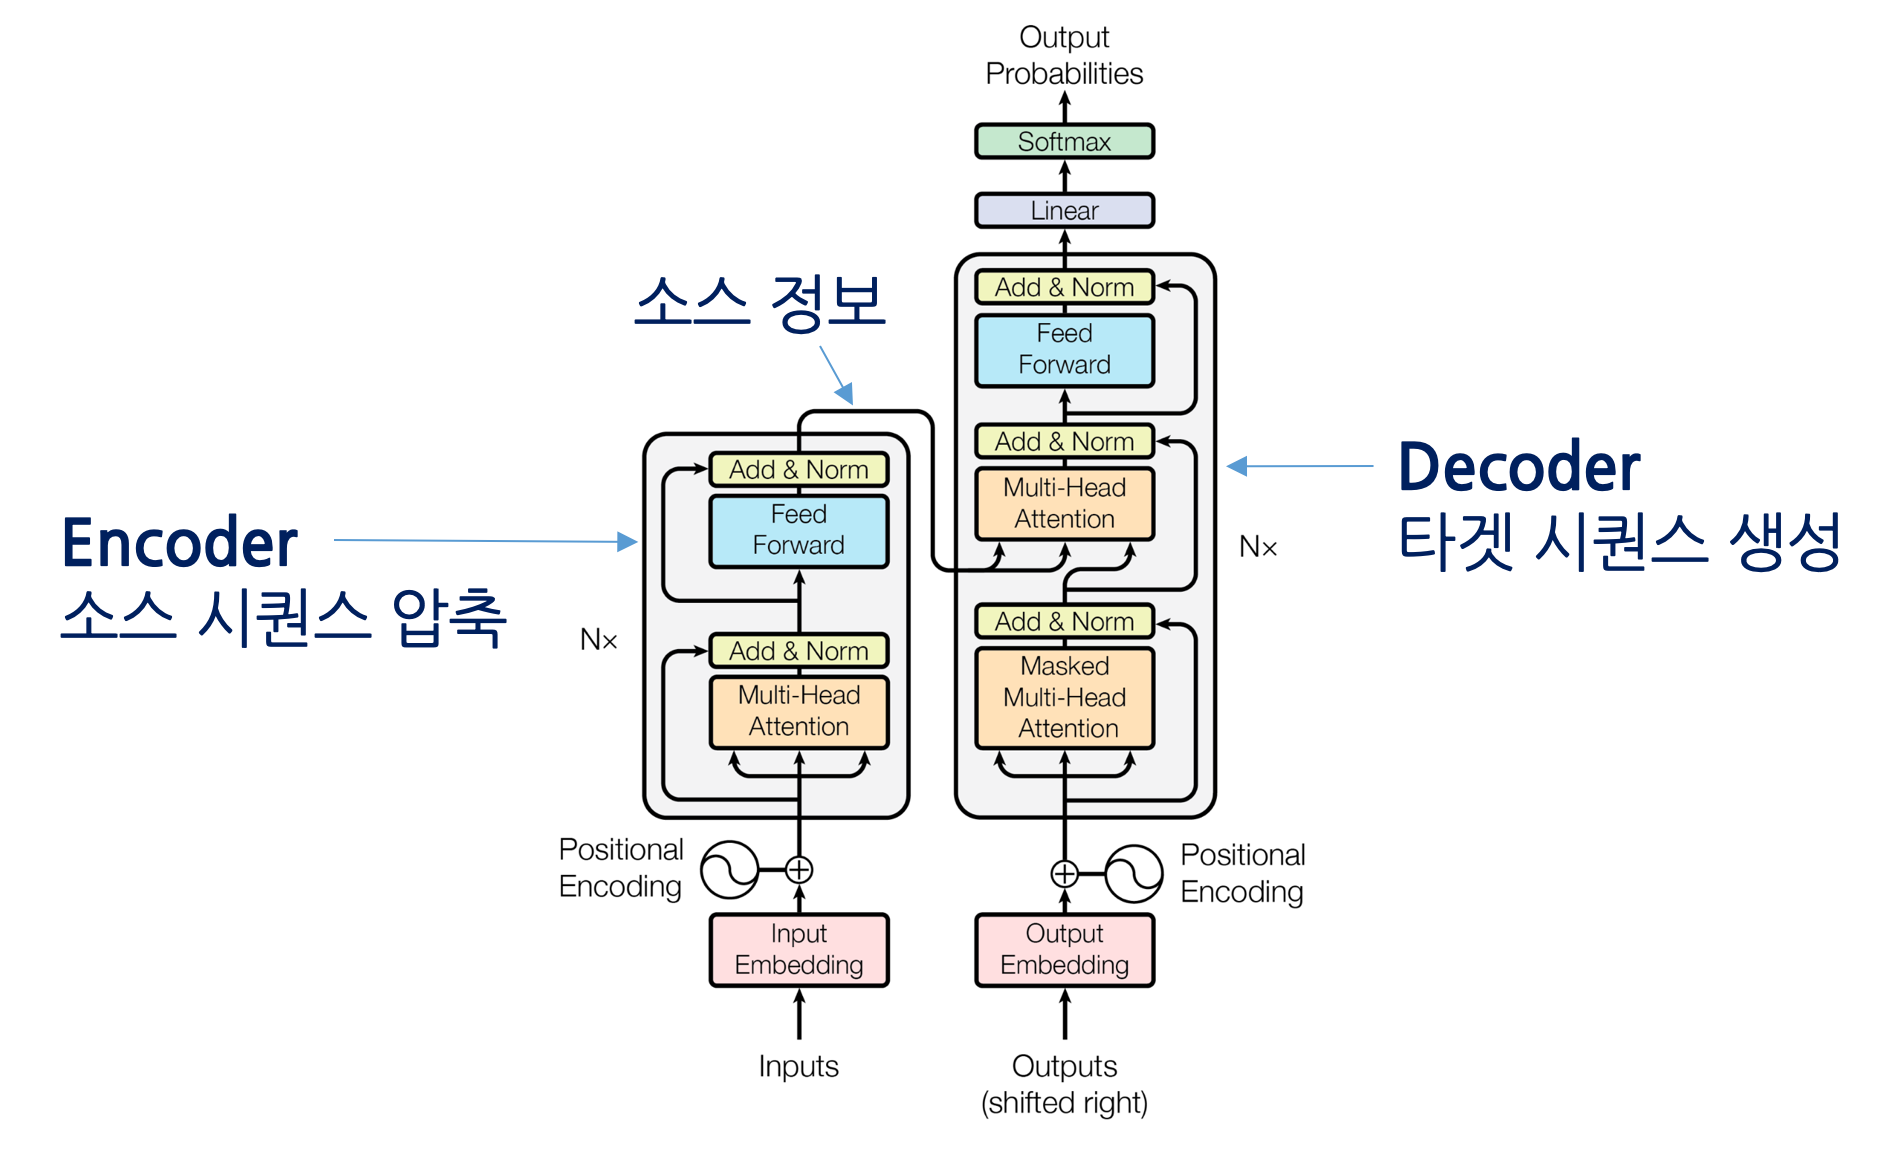

## 3) 구성 요소

### (1) Positional Encoding (위치 인코딩) ♣♣♣

#### 1] 개념

- 문장에 있는 단어의 위치를 나타내는 (단어 임베딩과 매우 유사한) 단순한 dense vector
- n번째 위치 인코딩이 각 문장에 있는 n번째 단어 임베딩에 더해짐 (이를 통해 모델이 각 단어의 위치를 알 수 있음)

#### 2] 수식

- 문장 안에 있는 단어의 위치를 인코딩한 dense vector
- 사인, 코사인 함수로 정의한 고정된 위치 인코딩
- $P_{p,i}$는 문장에서 p번째 위치에 있는 단어를 위한 인코딩의 i번째 원소를 의미 ♣♣

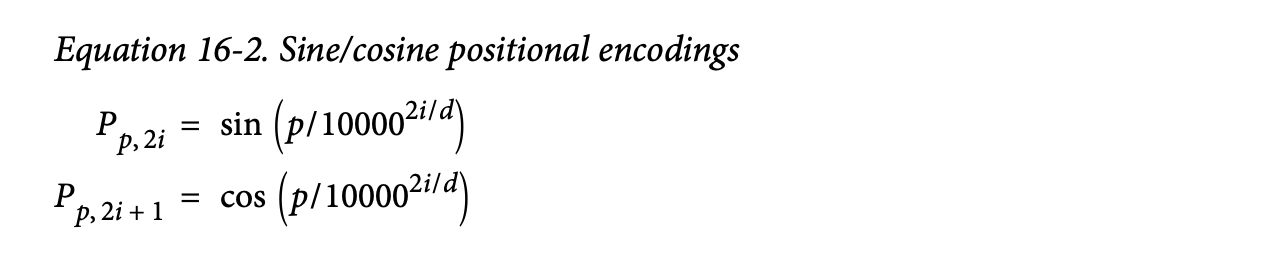

### (2) Multi-Head Attention (멀티-헤드 어텐션) ♣♣

#### 1] 개념

- 관련이 많은 단어에 더 많은 주의를 기울이면서 각 단어와 동일한 문장에 있는 다른 단어의 관계를 인코딩
- 예: They welcomed the Queen of the United Kingdom에서 단어 Queen은 United와 Kingdom에 더 주의
- 이 어텐션 메커니즘을 셀프-어텐션(self-attention)이라고 함 (문장 자기 자신에게 주의를 기울인다) ♣♣

#### 2] 수식

- Scaled Dot-Product Attention
  - Q: 행마다 쿼리(query) 하나를 담은 행렬
  - K: 행마다 키(key) 하나를 담은 행렬
  - V: 행마다 값(value) 하나를 담은 행렬
  - QK^T: 쿼리/키 쌍의 유사도 점수 ♣♣
  - softmax 함수가 포화되어 그레디언트가 너무 작아지지 않도록 스케일링 인자 d_keys 사용 ♣♣♣

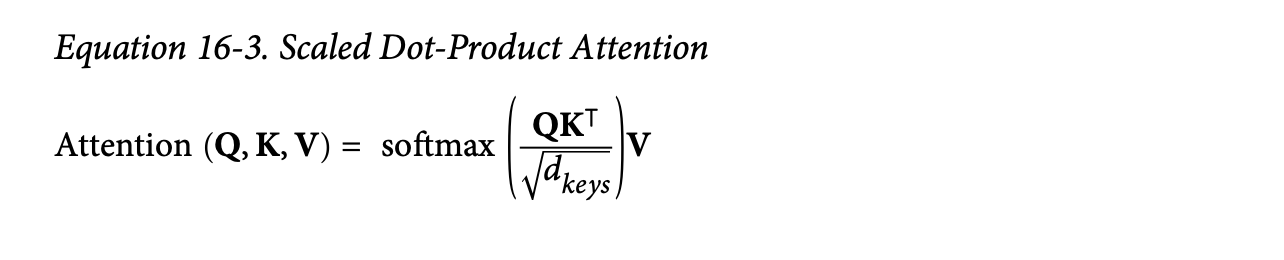

#### 3] 구조

- Multi Head Attention : Scaled Dot Product Attention 층의 묶음 ♣♣
- 모델이 단어 표현을 여러 부분 공간(subspace)으로 다양하게 투영할 수 있음 ♣♣
  - 예: They played chess 문장
    - Scaled Dot Product Attention (1)은 played가 '동사'라는 정보의 부분 공간으로 투영
    - Scaled Dot Product Attention (2)는 played가 '과거형'이라는 정보의 부분 공간으로 투영
- 마지막으로 모든 결과를 연결(concat)하여 원본 공간으로 다시 투영
- 참조: https://www.tensorflow.org/text/tutorials/transformer

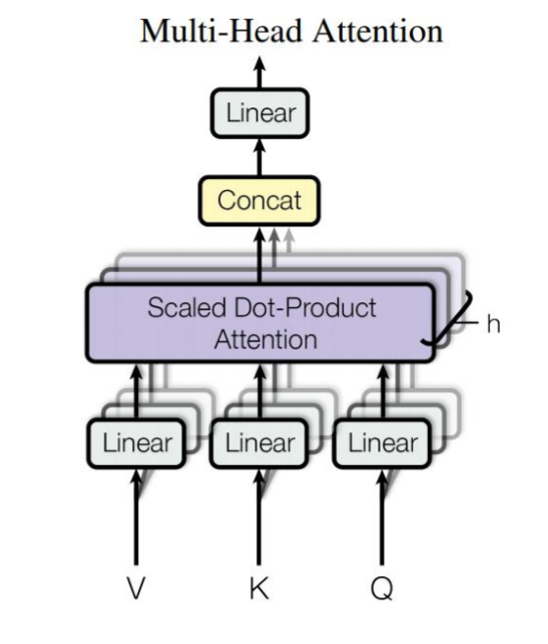

In [ ]:
class PositionalEncoding(keras.layers.Layer):
    def __init__(self, max_steps, max_dims, dtype=tf.float32, **kwargs):
        super().__init__(dtype=dtype, **kwargs)
        if max_dims % 2 == 1: max_dims += 1 # max_dims must be even
        p, i = np.meshgrid(np.arange(max_steps), np.arange(max_dims // 2))
        pos_emb = np.empty((1, max_steps, max_dims))
        pos_emb[0, :, ::2] = np.sin(p / 10000**(2 * i / max_dims)).T
        pos_emb[0, :, 1::2] = np.cos(p / 10000**(2 * i / max_dims)).T
        self.positional_embedding = tf.constant(pos_emb.astype(self.dtype))
    def call(self, inputs):
        shape = tf.shape(inputs)
        return inputs + self.positional_embedding[:, :shape[-2], :shape[-1]]

In [ ]:
max_steps = 201
max_dims = 512
pos_emb = PositionalEncoding(max_steps, max_dims)
PE = pos_emb(np.zeros((1, max_steps, max_dims), np.float32))[0].numpy()

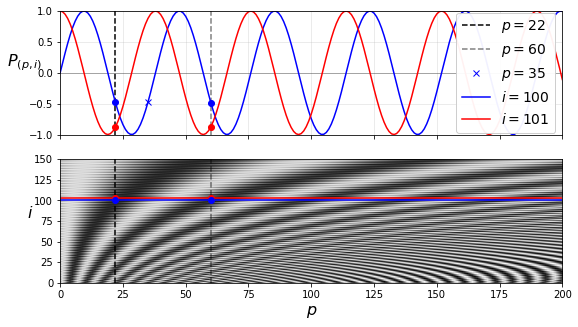

In [ ]:
i1, i2, crop_i = 100, 101, 150
p1, p2, p3 = 22, 60, 35
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(9, 5))
ax1.plot([p1, p1], [-1, 1], "k--", label="$p = {}$".format(p1))
ax1.plot([p2, p2], [-1, 1], "k--", label="$p = {}$".format(p2), alpha=0.5)
ax1.plot(p3, PE[p3, i1], "bx", label="$p = {}$".format(p3))
ax1.plot(PE[:,i1], "b-", label="$i = {}$".format(i1))
ax1.plot(PE[:,i2], "r-", label="$i = {}$".format(i2))
ax1.plot([p1, p2], [PE[p1, i1], PE[p2, i1]], "bo")
ax1.plot([p1, p2], [PE[p1, i2], PE[p2, i2]], "ro")
ax1.legend(loc="center right", fontsize=14, framealpha=0.95)
ax1.set_ylabel("$P_{(p,i)}$", rotation=0, fontsize=16)
ax1.grid(True, alpha=0.3)
ax1.hlines(0, 0, max_steps - 1, color="k", linewidth=1, alpha=0.3)
ax1.axis([0, max_steps - 1, -1, 1])
ax2.imshow(PE.T[:crop_i], cmap="gray", interpolation="bilinear", aspect="auto")
ax2.hlines(i1, 0, max_steps - 1, color="b")
cheat = 2 # need to raise the red line a bit, or else it hides the blue one
ax2.hlines(i2+cheat, 0, max_steps - 1, color="r")
ax2.plot([p1, p1], [0, crop_i], "k--")
ax2.plot([p2, p2], [0, crop_i], "k--", alpha=0.5)
ax2.plot([p1, p2], [i2+cheat, i2+cheat], "ro")
ax2.plot([p1, p2], [i1, i1], "bo")
ax2.axis([0, max_steps - 1, 0, crop_i])
ax2.set_xlabel("$p$", fontsize=16)
ax2.set_ylabel("$i$", rotation=0, fontsize=16)
plt.show()

In [ ]:
embed_size = 512; max_steps = 500; vocab_size = 10000
encoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)
decoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)
embeddings = keras.layers.Embedding(vocab_size, embed_size)
encoder_embeddings = embeddings(encoder_inputs)
decoder_embeddings = embeddings(decoder_inputs)
positional_encoding = PositionalEncoding(max_steps, max_dims=embed_size)
encoder_in = positional_encoding(encoder_embeddings)
decoder_in = positional_encoding(decoder_embeddings)

다음은 (매우) 간소화한 Transformer:

In [ ]:
Z = encoder_in
for N in range(6):
    Z = keras.layers.Attention(use_scale=True)([Z, Z])

encoder_outputs = Z
Z = decoder_in
for N in range(6):
    Z = keras.layers.Attention(use_scale=True, causal=True)([Z, Z])
    Z = keras.layers.Attention(use_scale=True)([Z, encoder_outputs])

outputs = keras.layers.TimeDistributed(
    keras.layers.Dense(vocab_size, activation="softmax"))(Z)

다음은 기본적인 `MultiHeadAttention` 층의 구현:

In [ ]:
K = keras.backend

class MultiHeadAttention(keras.layers.Layer):
    def __init__(self, n_heads, causal=False, use_scale=False, **kwargs):
        self.n_heads = n_heads
        self.causal = causal
        self.use_scale = use_scale
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.dims = batch_input_shape[0][-1]
        self.q_dims, self.v_dims, self.k_dims = [self.dims // self.n_heads] * 3 # could be hyperparameters instead
        self.q_linear = keras.layers.Conv1D(self.n_heads * self.q_dims, kernel_size=1, use_bias=False)
        self.v_linear = keras.layers.Conv1D(self.n_heads * self.v_dims, kernel_size=1, use_bias=False)
        self.k_linear = keras.layers.Conv1D(self.n_heads * self.k_dims, kernel_size=1, use_bias=False)
        self.attention = keras.layers.Attention(causal=self.causal, use_scale=self.use_scale)
        self.out_linear = keras.layers.Conv1D(self.dims, kernel_size=1, use_bias=False)
        super().build(batch_input_shape)
    def _multi_head_linear(self, inputs, linear):
        shape = K.concatenate([K.shape(inputs)[:-1], [self.n_heads, -1]])
        projected = K.reshape(linear(inputs), shape)
        perm = K.permute_dimensions(projected, [0, 2, 1, 3])
        return K.reshape(perm, [shape[0] * self.n_heads, shape[1], -1])
    def call(self, inputs):
        q = inputs[0]
        v = inputs[1]
        k = inputs[2] if len(inputs) > 2 else v
        shape = K.shape(q)
        q_proj = self._multi_head_linear(q, self.q_linear)
        v_proj = self._multi_head_linear(v, self.v_linear)
        k_proj = self._multi_head_linear(k, self.k_linear)
        multi_attended = self.attention([q_proj, v_proj, k_proj])
        shape_attended = K.shape(multi_attended)
        reshaped_attended = K.reshape(multi_attended, [shape[0], self.n_heads, shape_attended[1], shape_attended[2]])
        perm = K.permute_dimensions(reshaped_attended, [0, 2, 1, 3])
        concat = K.reshape(perm, [shape[0], shape_attended[1], -1])
        return self.out_linear(concat)

In [ ]:
Q = np.random.rand(2, 50, 512)
V = np.random.rand(2, 80, 512)
multi_attn = MultiHeadAttention(8)
multi_attn([Q, V]).shape

TensorShape([2, 50, 512])